In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [123]:
df = pd.read_csv('anime.csv')
df.head()

,title,mediaType,eps,duration,ongoing,startYr,finishYr,sznOfRelease,description,studios,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes
0,Fullmetal Alchemist: Brotherhood,TV,64.0,NaN,False,2009.0,2010.0,Spring,The foundation of alchemy is based on the law ...,['Bones'],"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...","['Animal Abuse', 'Mature Themes', 'Violence', ...",103707.0,14351,25810,2656,4.702,86547.0
1,your name.,Movie,1.0,107.0,False,2016.0,2016.0,NaN,Mitsuha and Taki are two total strangers livin...,['CoMix Wave Films'],"['Drama', 'Romance', 'Body Swapping', 'Gender ...",[],58831.0,1453,21733,124,4.663,43960.0
2,A Silent Voice,Movie,1.0,130.0,False,2016.0,2016.0,NaN,"After transferring into a new school, a deaf g...",['Kyoto Animation'],"['Drama', 'Shounen', 'Disability', 'Melancholy...","['Bullying', 'Mature Themes', 'Suicide']",45892.0,946,17148,132,4.661,33752.0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,TV,10.0,NaN,False,2016.0,2016.0,Fall,"Picking up where the second season ended, the ...",['Production I.G'],"['Shounen', 'Sports', 'Animeism', 'School Club...",[],25134.0,2183,8082,167,4.660,17422.0
4,Attack on Titan 3rd Season: Part II,TV,10.0,NaN,False,2019.0,2019.0,Spring,The battle to retake Wall Maria begins now! Wi...,['Wit Studio'],"['Action', 'Fantasy', 'Horror', 'Shounen', 'Da...","['Cannibalism', 'Explicit Violence']",21308.0,3217,7864,174,4.650,15789.0


In [4]:
df.isna().sum()

mediaType          68
eps               359
duration         5441
ongoing             0
startYr           222
finishYr          444
sznOfRelease    10811
description      6405
studios             0
tags                0
contentWarn         0
watched           222
watching            0
wantWatch           0
dropped             0
rating           2471
votes            2459
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14578 entries, Fullmetal Alchemist: Brotherhood to YOASOBI: Harujion
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mediaType     14510 non-null  object 
 1   eps           14219 non-null  float64
 2   duration      9137 non-null   float64
 3   ongoing       14578 non-null  bool   
 4   startYr       14356 non-null  float64
 5   finishYr      14134 non-null  float64
 6   sznOfRelease  3767 non-null   object 
 7   description   8173 non-null   object 
 8   studios       14578 non-null  object 
 9   tags          14578 non-null  object 
 10  contentWarn   14578 non-null  object 
 11  watched       14356 non-null  float64
 12  watching      14578 non-null  int64  
 13  wantWatch     14578 non-null  int64  
 14  dropped       14578 non-null  int64  
 15  rating        12107 non-null  float64
 16  votes         12119 non-null  float64
dtypes: bool(1), float64(7), int64(3

In [6]:
df.mediaType.unique()

array(['TV', 'Movie', 'Web', 'TV Special', 'OVA', nan, 'DVD Special',
       'Other', 'Music Video'], dtype=object)

In [7]:
bsDesc = []

for i in df.columns:
    bsDesc.append([
        i,
        df[i].dtypes,
        df[i].isnull().sum(),
        round((((df[i].isnull().sum()) / (len(df))) * 100 ), 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [8]:
pd.DataFrame(data = bsDesc,
            columns = [
                'dataFeatures',
                'dataType',
                'Null',
                'NullPercentage',
                'unique',
                'uniqueSample'
            ])

,dataFeatures,dataType,Null,NullPercentage,unique,uniqueSample
0,mediaType,object,68,0.47,8,"[Music Video, DVD Special]"
1,eps,float64,359,2.46,209,"[162.0, 607.0]"
2,duration,float64,5441,37.32,147,"[34.0, 93.0]"
3,ongoing,bool,0,0.00,2,"[False, True]"
4,startYr,float64,222,1.52,104,"[1961.0, 1957.0]"
5,finishYr,float64,444,3.05,104,"[2008.0, 1962.0]"
6,sznOfRelease,object,10811,74.16,4,"[Spring, Summer]"
7,description,object,6405,43.94,8108,"[While riding a lift one day, a boy, dressed i..."
8,studios,object,0,0.00,864,"[['Toei Animation', 'Gallop'], ['Tokyo Kids', ..."
9,tags,object,0,0.00,9580,"[['Comedy', 'Ecchi', 'Master-Servant Relations..."


In [9]:
df.describe(include='O')

,mediaType,sznOfRelease,description,studios,tags,contentWarn
count,14510,3767,8173,14578,14578,14578
unique,8,4,8108,864,9580,178
top,TV,Spring,"In 19th century Belgium, in the Flanders count...",[],[],[]
freq,4510,1202,3,4808,385,13149


In [10]:
df.dropna(inplace=True)

In [11]:
df.isna().sum()

mediaType       0
eps             0
duration        0
ongoing         0
startYr         0
finishYr        0
sznOfRelease    0
description     0
studios         0
tags            0
contentWarn     0
watched         0
watching        0
wantWatch       0
dropped         0
rating          0
votes           0
dtype: int64

In [12]:
df.head()

,mediaType,eps,duration,ongoing,startYr,finishYr,sznOfRelease,description,studios,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes
title,,,,,,,,,,,,,,,,,
The Disastrous Life of Saiki K.,TV,120.0,4.0,False,2016.0,2016.0,Summer,Kusuo Saiki is a typical 16-year-old high scho...,['J.C. Staff'],"['Comedy', 'Shounen', 'Slice of Life', 'Breaki...",[],15419.0,2694,4889,749,4.453,11754.0
Castlevania Season 2,Web,8.0,25.0,False,2018.0,2018.0,Fall,Trying to save Eastern Europe from extinction ...,"['Powerhouse Animation', 'Frederator Studios']","['Action', 'Adventure', 'Drama', 'Horror', '15...","['Explicit Violence', 'Mature Themes', 'Physic...",8010.0,384,2207,58,4.409,5564.0
The Disastrous Life of Saiki K. - Reawakened,Web,6.0,23.0,False,2019.0,2019.0,Winter,Kusuo and his gaggle of self-proclaimed friend...,['J.C. Staff'],"['Comedy', 'Shounen', 'Breaking the Fourth Wal...",[],3136.0,258,1402,26,4.400,1942.0
Katanagatari,TV,12.0,50.0,False,2010.0,2010.0,Winter,In the wake of a rebellion that shook Japan tw...,['WHITE FOX'],"['Action', 'Adventure', 'Drama', 'Fantasy', 'R...",[],14691.0,2657,12044,1159,4.402,12974.0
Castlevania Season 3,Web,10.0,28.0,False,2020.0,2020.0,Winter,"After the fall of Dracula, heroes and villains...","['Powerhouse Animation', 'Frederator Studios']","['Action', 'Adventure', 'Drama', 'Horror', '15...","['Explicit Sex', 'Explicit Violence', 'Mature ...",2975.0,312,2828,20,4.402,2128.0


## Feature Engineering

In [13]:
df.mediaType.unique()

array(['TV', 'Web'], dtype=object)

In [14]:
df['mediaType'] = df['mediaType'].map({
    "TV" : 0,
    "Web":1
})

In [15]:
df.head()

,mediaType,eps,duration,ongoing,startYr,finishYr,sznOfRelease,description,studios,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes
title,,,,,,,,,,,,,,,,,
The Disastrous Life of Saiki K.,0,120.0,4.0,False,2016.0,2016.0,Summer,Kusuo Saiki is a typical 16-year-old high scho...,['J.C. Staff'],"['Comedy', 'Shounen', 'Slice of Life', 'Breaki...",[],15419.0,2694,4889,749,4.453,11754.0
Castlevania Season 2,1,8.0,25.0,False,2018.0,2018.0,Fall,Trying to save Eastern Europe from extinction ...,"['Powerhouse Animation', 'Frederator Studios']","['Action', 'Adventure', 'Drama', 'Horror', '15...","['Explicit Violence', 'Mature Themes', 'Physic...",8010.0,384,2207,58,4.409,5564.0
The Disastrous Life of Saiki K. - Reawakened,1,6.0,23.0,False,2019.0,2019.0,Winter,Kusuo and his gaggle of self-proclaimed friend...,['J.C. Staff'],"['Comedy', 'Shounen', 'Breaking the Fourth Wal...",[],3136.0,258,1402,26,4.400,1942.0
Katanagatari,0,12.0,50.0,False,2010.0,2010.0,Winter,In the wake of a rebellion that shook Japan tw...,['WHITE FOX'],"['Action', 'Adventure', 'Drama', 'Fantasy', 'R...",[],14691.0,2657,12044,1159,4.402,12974.0
Castlevania Season 3,1,10.0,28.0,False,2020.0,2020.0,Winter,"After the fall of Dracula, heroes and villains...","['Powerhouse Animation', 'Frederator Studios']","['Action', 'Adventure', 'Drama', 'Horror', '15...","['Explicit Sex', 'Explicit Violence', 'Mature ...",2975.0,312,2828,20,4.402,2128.0


In [16]:
df.sznOfRelease.unique()

array(['Summer', 'Fall', 'Winter', 'Spring'], dtype=object)

In [17]:
df = pd.get_dummies(data = df, columns=['sznOfRelease'])

In [18]:
df.head()

,mediaType,eps,duration,ongoing,startYr,finishYr,description,studios,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes,sznOfRelease_Fall,sznOfRelease_Spring,sznOfRelease_Summer,sznOfRelease_Winter
title,,,,,,,,,,,,,,,,,,,,
The Disastrous Life of Saiki K.,0,120.0,4.0,False,2016.0,2016.0,Kusuo Saiki is a typical 16-year-old high scho...,['J.C. Staff'],"['Comedy', 'Shounen', 'Slice of Life', 'Breaki...",[],15419.0,2694,4889,749,4.453,11754.0,0,0,1,0
Castlevania Season 2,1,8.0,25.0,False,2018.0,2018.0,Trying to save Eastern Europe from extinction ...,"['Powerhouse Animation', 'Frederator Studios']","['Action', 'Adventure', 'Drama', 'Horror', '15...","['Explicit Violence', 'Mature Themes', 'Physic...",8010.0,384,2207,58,4.409,5564.0,1,0,0,0
The Disastrous Life of Saiki K. - Reawakened,1,6.0,23.0,False,2019.0,2019.0,Kusuo and his gaggle of self-proclaimed friend...,['J.C. Staff'],"['Comedy', 'Shounen', 'Breaking the Fourth Wal...",[],3136.0,258,1402,26,4.400,1942.0,0,0,0,1
Katanagatari,0,12.0,50.0,False,2010.0,2010.0,In the wake of a rebellion that shook Japan tw...,['WHITE FOX'],"['Action', 'Adventure', 'Drama', 'Fantasy', 'R...",[],14691.0,2657,12044,1159,4.402,12974.0,0,0,0,1
Castlevania Season 3,1,10.0,28.0,False,2020.0,2020.0,"After the fall of Dracula, heroes and villains...","['Powerhouse Animation', 'Frederator Studios']","['Action', 'Adventure', 'Drama', 'Horror', '15...","['Explicit Sex', 'Explicit Violence', 'Mature ...",2975.0,312,2828,20,4.402,2128.0,0,0,0,1


In [19]:
df["sznOfRelease_Fall"].value_counts()

0    512
1    200
Name: sznOfRelease_Fall, dtype: int64

In [20]:
df["sznOfRelease_Spring"].value_counts()

0    508
1    204
Name: sznOfRelease_Spring, dtype: int64

In [21]:
df["sznOfRelease_Summer"].value_counts()

0    553
1    159
Name: sznOfRelease_Summer, dtype: int64

In [22]:
df["sznOfRelease_Winter"].value_counts()

0    563
1    149
Name: sznOfRelease_Winter, dtype: int64

<AxesSubplot:xlabel='votes'>

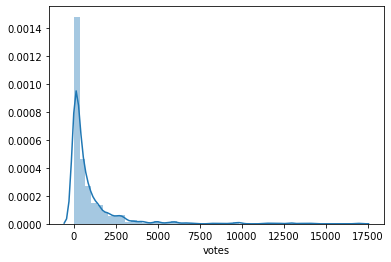

In [23]:
sns.distplot(df['votes'])

<AxesSubplot:>

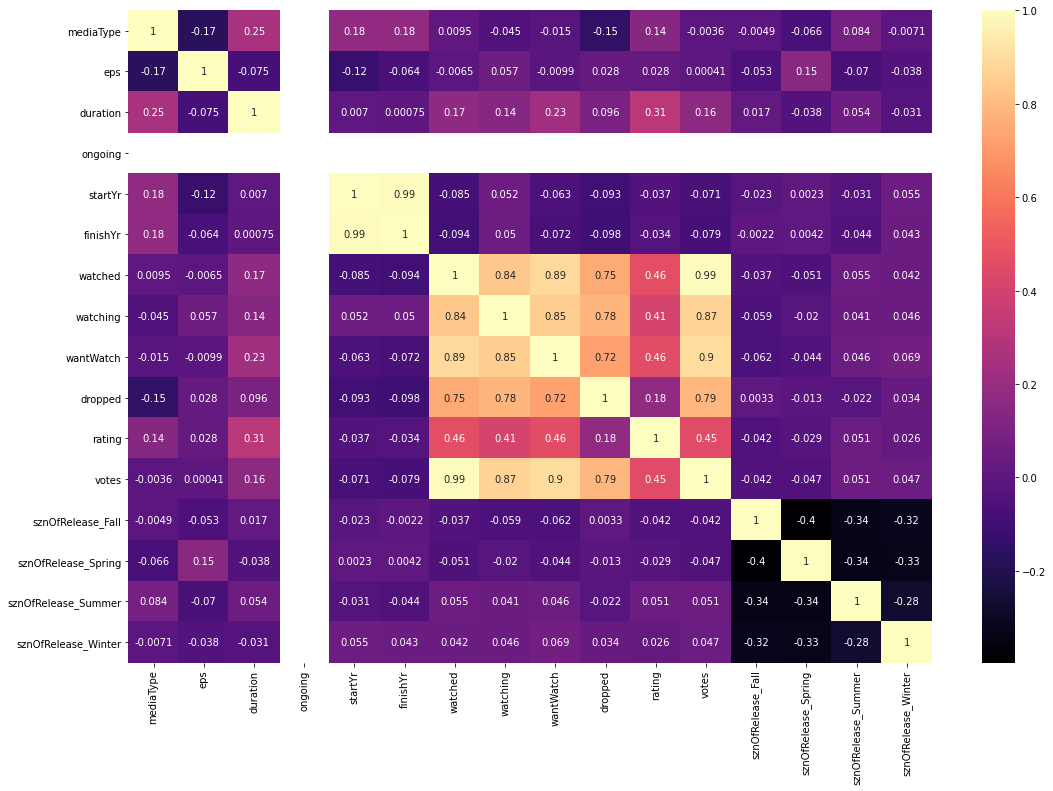

In [24]:
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), annot=True, cmap='magma')

<AxesSubplot:>

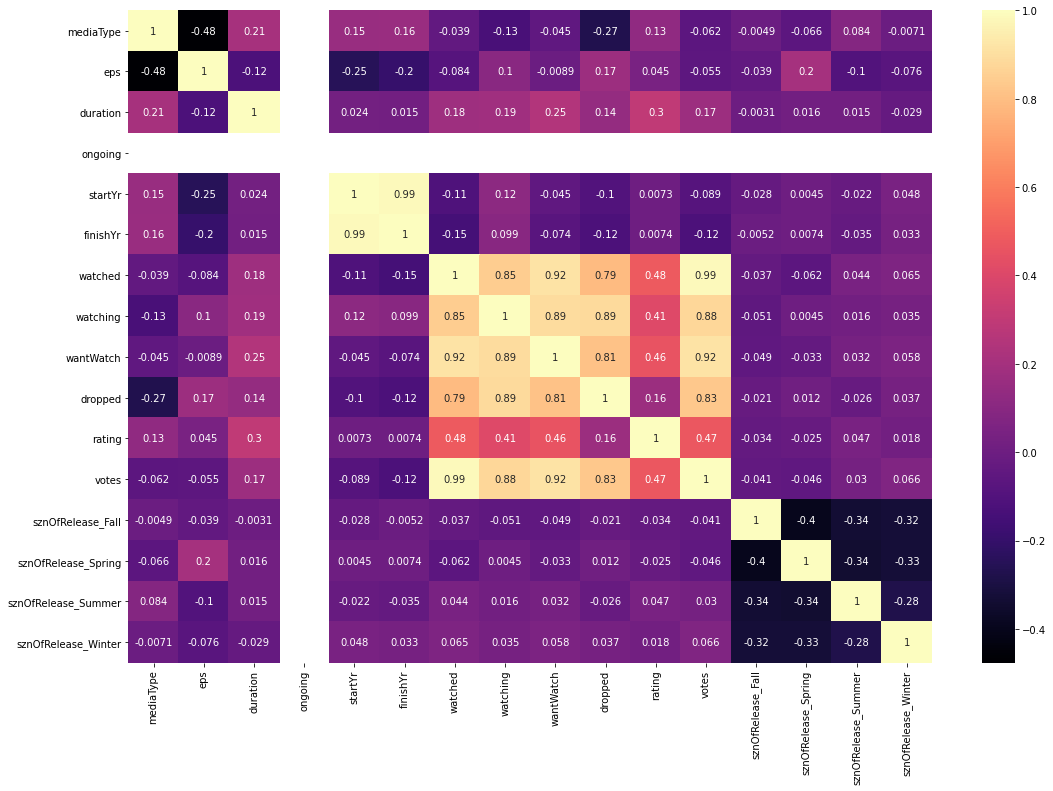

In [25]:
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr('spearman'), annot=True, cmap='magma')

In [26]:
df.ongoing.unique()

array([False])

In [27]:
df1 = df.copy()

In [28]:
df1.drop(columns=['eps','mediaType', 'startYr', 'finishYr', 'duration', 'ongoing','sznOfRelease_Fall','sznOfRelease_Spring','sznOfRelease_Summer', 'sznOfRelease_Winter','duration'], inplace=True)

In [29]:
df1.head()

,description,studios,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes
title,,,,,,,,,,
The Disastrous Life of Saiki K.,Kusuo Saiki is a typical 16-year-old high scho...,['J.C. Staff'],"['Comedy', 'Shounen', 'Slice of Life', 'Breaki...",[],15419.0,2694,4889,749,4.453,11754.0
Castlevania Season 2,Trying to save Eastern Europe from extinction ...,"['Powerhouse Animation', 'Frederator Studios']","['Action', 'Adventure', 'Drama', 'Horror', '15...","['Explicit Violence', 'Mature Themes', 'Physic...",8010.0,384,2207,58,4.409,5564.0
The Disastrous Life of Saiki K. - Reawakened,Kusuo and his gaggle of self-proclaimed friend...,['J.C. Staff'],"['Comedy', 'Shounen', 'Breaking the Fourth Wal...",[],3136.0,258,1402,26,4.400,1942.0
Katanagatari,In the wake of a rebellion that shook Japan tw...,['WHITE FOX'],"['Action', 'Adventure', 'Drama', 'Fantasy', 'R...",[],14691.0,2657,12044,1159,4.402,12974.0
Castlevania Season 3,"After the fall of Dracula, heroes and villains...","['Powerhouse Animation', 'Frederator Studios']","['Action', 'Adventure', 'Drama', 'Horror', '15...","['Explicit Sex', 'Explicit Violence', 'Mature ...",2975.0,312,2828,20,4.402,2128.0


In [30]:
df1.drop(columns=['description','studios', 'tags', 'contentWarn'], inplace=True)

In [31]:
df1.head()

,watched,watching,wantWatch,dropped,rating,votes
title,,,,,,
The Disastrous Life of Saiki K.,15419.0,2694,4889,749,4.453,11754.0
Castlevania Season 2,8010.0,384,2207,58,4.409,5564.0
The Disastrous Life of Saiki K. - Reawakened,3136.0,258,1402,26,4.400,1942.0
Katanagatari,14691.0,2657,12044,1159,4.402,12974.0
Castlevania Season 3,2975.0,312,2828,20,4.402,2128.0


## Modelling Predictions 1

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = df1.drop(columns=['votes'])
y = df1['votes']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .75, random_state = 42)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
model = LogisticRegression()

In [37]:
model.fit(X_train, y_train)

LogisticRegression()

In [38]:
model.score(X_train, y_train) ## Akurasi Training

0.17228464419475656

In [39]:
model.score(X_test, y_test) ### Akurasi Test

0.0056179775280898875

In [40]:
model.predict([[1000, 2999, 3000, 4000, 4.5]])[0]

2324.0

## Evaluation Matrics 1

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [42]:
vote_pred = model.predict(X_train) ## Model menjawab Soal Latihan

In [43]:
MAE_train = mean_absolute_error(y_train, vote_pred)
MAE_train

1583.2771535580525

In [44]:
MSE_train = mean_squared_error(y_train, vote_pred)
MSE_train

8364729.093632959

In [45]:
RMSE_train = np.sqrt(MSE_train)
RMSE_train

2892.1841389567435

In [46]:
R_square_train = r2_score(y_train, vote_pred)
R_square_train

-1.8278537149030876

In [47]:
print('Hasil Evaluasi Metrics untuk Training')
print('MAE : ', MAE_train)
print('MSE : ', MSE_train)
print('RMSE : ', RMSE_train)
print('R2 : ', R_square_train)

Hasil Evaluasi Metrics untuk Training
MAE :  1583.2771535580525
MSE :  8364729.093632959
RMSE :  2892.1841389567435
R2 :  -1.8278537149030876


### Model 1 Tidak Bagus

# Tuning agar Model Bisa dipakai

In [48]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [49]:
model_ridge = Ridge(alpha = 3.5)
model_ridge.fit(X_train, y_train)
model_ridge.score(X_test, y_test) ### R2_score

0.9950533534228186

In [50]:
a = [0.01, 0.1, 0.2, 0.5,1,1.5,2,2.5,3,3.5]

In [51]:
eva = []
for i in a:
    model_ridge = Ridge(alpha = i)
    model_ridge.fit(X_train, y_train)
    score = model_ridge.score(X_test, y_test)
    eva.append(score)

eva

[0.9950518244434088,
 0.9950518646792963,
 0.9950519093347865,
 0.9950520429797485,
 0.9950522646552751,
 0.9950524850082686,
 0.9950527040502215,
 0.9950529217924959,
 0.9950531382463259,
 0.9950533534228186]

In [52]:
evaL = []
for i in a:
    model_lasso = Lasso(alpha = i)
    model_lasso.fit(X_train, y_train)
    score = model_lasso.score(X_test, y_test)
    evaL.append(score)

evaL

[0.9950519843270813,
 0.9950534555496588,
 0.9950550796190532,
 0.9950599839896951,
 0.9950677958323806,
 0.9950752929863524,
 0.9950824937840921,
 0.9950893775697623,
 0.9950959284804484,
 0.9951022068274058]

In [53]:
model_lasso = Lasso(alpha = 3.5)
model_lasso.fit(X_train, y_train)
model_lasso.score(X_test, y_test)

0.9951022068274058

In [54]:
model_ridge.predict([[1000, 2999, 3000, 4000, 4.5]])[0]

5173.2675061140335

In [55]:
model_lasso.predict([[1000, 2999, 3000, 4000, 4.5]])[0]

5104.739528521228

## Hasil Akhir Memakai Model Predictions Lasso

## Coba2 pakai model yang lain

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
model1 = RandomForestClassifier()

In [58]:
model1.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
model.predict([[1000, 2999, 3000, 4000, 4.5]])[0]

2324.0

In [60]:
from sklearn.metrics import classification_report

In [61]:
y_pred = model.predict(X_test)

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        12.0       0.00      0.00      0.00         4
        14.0       0.00      0.00      0.00         1
        15.0       0.00      0.00      0.00         1
        16.0       0.00      0.00      0.00         2
        17.0       0.00      0.00      0.00         1
        18.0       0.00      0.00      0.00         2
        19.0       0.00      0.00      0.00         1
        20.0       0.50      0.50      0.50         2
        21.0       0.00      0.00      0.00         1
        22.0       0.00      0.00      0.00         1
        23.0       0.00      0.00      0.00         1
        24.0       0.00      0.00      0.00         2
        26.0       0.00      0.00      0.00         1
        27.0       0.00      0.00      0.00         1
        28.0       0.00      0.00      0.00         1
        29.0       0.00      0.00      0.00         2
        30.0       0.00      0.00      0.00         1
        34.0       0.00    

In [63]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [64]:
model_KNN = KNeighborsClassifier(n_neighbors= 21)

In [65]:
model_KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [66]:
model_KNN.score(X_test, y_test)

0.016853932584269662

In [67]:
pred_KNN = model_KNN.predict(X_test)

In [68]:
print(classification_report(y_test, pred_KNN))

              precision    recall  f1-score   support

        12.0       0.38      0.75      0.50         4
        13.0       0.00      0.00      0.00         0
        14.0       0.00      0.00      0.00         1
        15.0       0.00      0.00      0.00         1
        16.0       0.00      0.00      0.00         2
        17.0       0.00      0.00      0.00         1
        18.0       0.00      0.00      0.00         2
        19.0       0.00      0.00      0.00         1
        20.0       0.00      0.00      0.00         2
        21.0       0.00      0.00      0.00         1
        22.0       0.00      0.00      0.00         1
        23.0       0.00      0.00      0.00         1
        24.0       0.00      0.00      0.00         2
        26.0       0.00      0.00      0.00         1
        27.0       0.00      0.00      0.00         1
        28.0       0.00      0.00      0.00         1
        29.0       0.00      0.00      0.00         2
        30.0       0.00    

In [69]:
from sklearn.svm import SVC, SVR

In [70]:
model_SVM = SVC(C=2.5)

In [71]:
model_SVM.fit(X_train, y_train)

SVC(C=2.5)

In [72]:
model_SVM.score(X_test, y_test)

0.02247191011235955

In [73]:
pred_SVM = model_SVM.predict(X_test)

In [74]:
print(classification_report(y_test, pred_SVM))

              precision    recall  f1-score   support

        12.0       0.04      1.00      0.08         4
        14.0       0.00      0.00      0.00         1
        15.0       0.00      0.00      0.00         1
        16.0       0.00      0.00      0.00         2
        17.0       0.00      0.00      0.00         1
        18.0       0.00      0.00      0.00         2
        19.0       0.00      0.00      0.00         1
        20.0       0.00      0.00      0.00         2
        21.0       0.00      0.00      0.00         1
        22.0       0.00      0.00      0.00         1
        23.0       0.00      0.00      0.00         1
        24.0       0.00      0.00      0.00         2
        26.0       0.00      0.00      0.00         1
        27.0       0.00      0.00      0.00         1
        28.0       0.00      0.00      0.00         1
        29.0       0.00      0.00      0.00         2
        30.0       0.00      0.00      0.00         1
        34.0       0.00    

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
model_tree = DecisionTreeClassifier()

In [81]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [82]:
model_tree.score(X_test, y_test)

0.03932584269662921

In [83]:
pred_tree = model_tree.predict(X_test)
print(classification_report(y_test, pred_tree))

              precision    recall  f1-score   support

        11.0       0.00      0.00      0.00         0
        12.0       0.75      0.75      0.75         4
        13.0       0.00      0.00      0.00         0
        14.0       0.00      0.00      0.00         1
        15.0       0.00      0.00      0.00         1
        16.0       0.17      0.50      0.25         2
        17.0       0.00      0.00      0.00         1
        18.0       0.00      0.00      0.00         2
        19.0       0.00      0.00      0.00         1
        20.0       0.00      0.00      0.00         2
        21.0       0.00      0.00      0.00         1
        22.0       0.00      0.00      0.00         1
        23.0       0.00      0.00      0.00         1
        24.0       0.00      0.00      0.00         2
        25.0       0.00      0.00      0.00         0
        26.0       0.00      0.00      0.00         1
        27.0       0.00      0.00      0.00         1
        28.0       0.00    

## Coba pake Hyper tuning

In [84]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [86]:
model_Tree = DecisionTreeClassifier() ##klik Shift + Tab

In [87]:
param = {'criterion' : ['gini', 'entropy'],
        'max_depth' : [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

In [88]:
model = GridSearchCV(model_Tree, param_grid=param, cv = 4, n_jobs= -1, scoring='accuracy', verbose=1)
model.fit(X_train, y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    2.9s finished


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]},
             scoring='accuracy', verbose=1)

In [89]:
model.best_params_

{'criterion': 'entropy', 'max_depth': 15}

In [90]:
model_Tree_Tuned = model.best_estimator_

In [91]:
model_Tree_Tuned.predict(X_test)

array([7.1200e+02, 3.2000e+01, 2.1010e+03, 2.0780e+03, 2.1100e+02,
       2.0400e+02, 8.6700e+02, 1.4200e+03, 1.1000e+01, 4.7900e+02,
       8.7800e+03, 2.7720e+03, 4.0000e+02, 1.1000e+01, 5.4300e+02,
       1.6000e+01, 1.1990e+03, 2.2500e+02, 4.3700e+02, 2.4470e+03,
       1.6000e+01, 1.1470e+03, 4.7700e+02, 2.2000e+02, 1.2974e+04,
       2.1900e+02, 1.0120e+03, 5.1400e+02, 2.5700e+03, 3.2300e+02,
       4.3800e+02, 2.8660e+03, 5.1500e+02, 1.8000e+01, 2.8660e+03,
       6.4400e+02, 4.2510e+03, 9.5000e+01, 7.1200e+02, 1.0900e+02,
       5.1000e+01, 1.2900e+03, 2.6000e+01, 6.8100e+02, 2.2650e+03,
       5.6000e+01, 2.7600e+02, 1.1650e+03, 1.3460e+03, 1.0600e+02,
       4.5100e+02, 1.7200e+02, 1.8900e+02, 1.2800e+02, 1.6000e+01,
       5.0020e+03, 1.1250e+03, 1.4000e+01, 1.5700e+02, 1.1520e+03,
       5.4800e+02, 6.8100e+02, 3.8000e+01, 1.3000e+01, 1.6000e+01,
       3.0200e+02, 3.4000e+01, 2.1420e+03, 1.0200e+03, 6.6500e+02,
       1.4200e+03, 1.0900e+02, 5.4600e+02, 8.7800e+02, 1.8100e

In [92]:
model_Random = RandomizedSearchCV(model_Tree, param_distributions=param, n_iter = 20,cv = 4, n_jobs = -1, verbose=1, scoring='accuracy')

In [93]:
model_Random.fit(X_train, y_train)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.4s finished


RandomizedSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8, 9, 10, 11,
                                                      12, 15, 20, 30, 40, 50,
                                                      70, 90, 120, 150]},
                   scoring='accuracy', verbose=1)

In [94]:
model_Random.best_params_

{'max_depth': 7, 'criterion': 'entropy'}

In [95]:
model_Random.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [97]:
model_Tree_Tuned1 = model_Random.best_estimator_

In [96]:
model_Tree_Tuned.predict([[1000, 2999, 3000, 4000, 4.5]])[0]

965.0

In [99]:
model_Tree_Tuned.score(X_test, y_test)

0.02247191011235955

In [98]:
model_Tree_Tuned1.predict([[1000, 2999, 3000, 4000, 4.5]])[0]

918.0

In [100]:
model_Tree_Tuned1.score(X_test, y_test)

0.02247191011235955

## DecisionTreeClassifier tidak bisa dipakai

# Rekomendasi AI

In [124]:
df.isna().sum()

title               0
mediaType          68
eps               359
duration         5441
ongoing             0
startYr           222
finishYr          444
sznOfRelease    10811
description      6405
studios             0
tags                0
contentWarn         0
watched           222
watching            0
wantWatch           0
dropped             0
rating           2471
votes            2459
dtype: int64

In [125]:
df.dropna(inplace=True)

In [126]:
df.head()

,title,mediaType,eps,duration,ongoing,startYr,finishYr,sznOfRelease,description,studios,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes
149,The Disastrous Life of Saiki K.,TV,120.0,4.0,False,2016.0,2016.0,Summer,Kusuo Saiki is a typical 16-year-old high scho...,['J.C. Staff'],"['Comedy', 'Shounen', 'Slice of Life', 'Breaki...",[],15419.0,2694,4889,749,4.453,11754.0
222,Castlevania Season 2,Web,8.0,25.0,False,2018.0,2018.0,Fall,Trying to save Eastern Europe from extinction ...,"['Powerhouse Animation', 'Frederator Studios']","['Action', 'Adventure', 'Drama', 'Horror', '15...","['Explicit Violence', 'Mature Themes', 'Physic...",8010.0,384,2207,58,4.409,5564.0
236,The Disastrous Life of Saiki K. - Reawakened,Web,6.0,23.0,False,2019.0,2019.0,Winter,Kusuo and his gaggle of self-proclaimed friend...,['J.C. Staff'],"['Comedy', 'Shounen', 'Breaking the Fourth Wal...",[],3136.0,258,1402,26,4.400,1942.0
238,Katanagatari,TV,12.0,50.0,False,2010.0,2010.0,Winter,In the wake of a rebellion that shook Japan tw...,['WHITE FOX'],"['Action', 'Adventure', 'Drama', 'Fantasy', 'R...",[],14691.0,2657,12044,1159,4.402,12974.0
241,Castlevania Season 3,Web,10.0,28.0,False,2020.0,2020.0,Winter,"After the fall of Dracula, heroes and villains...","['Powerhouse Animation', 'Frederator Studios']","['Action', 'Adventure', 'Drama', 'Horror', '15...","['Explicit Sex', 'Explicit Violence', 'Mature ...",2975.0,312,2828,20,4.402,2128.0


In [127]:
fitur = ["studios", "tags", "contentWarn", "sznOfRelease"]

In [128]:
def combo_feature(x):
    return x['studios'] + " " + x['tags'] + " " + x['contentWarn'] + " " + x['sznOfRelease']

In [129]:
for i in fitur:
    df[i] = df[i].fillna("")

In [130]:
df['combo_feature'] = df.apply(combo_feature, axis=1)

In [131]:
df.head()

,title,mediaType,eps,duration,ongoing,startYr,finishYr,sznOfRelease,description,studios,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes,combo_feature
149,The Disastrous Life of Saiki K.,TV,120.0,4.0,False,2016.0,2016.0,Summer,Kusuo Saiki is a typical 16-year-old high scho...,['J.C. Staff'],"['Comedy', 'Shounen', 'Slice of Life', 'Breaki...",[],15419.0,2694,4889,749,4.453,11754.0,"['J.C. Staff'] ['Comedy', 'Shounen', 'Slice of..."
222,Castlevania Season 2,Web,8.0,25.0,False,2018.0,2018.0,Fall,Trying to save Eastern Europe from extinction ...,"['Powerhouse Animation', 'Frederator Studios']","['Action', 'Adventure', 'Drama', 'Horror', '15...","['Explicit Violence', 'Mature Themes', 'Physic...",8010.0,384,2207,58,4.409,5564.0,"['Powerhouse Animation', 'Frederator Studios']..."
236,The Disastrous Life of Saiki K. - Reawakened,Web,6.0,23.0,False,2019.0,2019.0,Winter,Kusuo and his gaggle of self-proclaimed friend...,['J.C. Staff'],"['Comedy', 'Shounen', 'Breaking the Fourth Wal...",[],3136.0,258,1402,26,4.400,1942.0,"['J.C. Staff'] ['Comedy', 'Shounen', 'Breaking..."
238,Katanagatari,TV,12.0,50.0,False,2010.0,2010.0,Winter,In the wake of a rebellion that shook Japan tw...,['WHITE FOX'],"['Action', 'Adventure', 'Drama', 'Fantasy', 'R...",[],14691.0,2657,12044,1159,4.402,12974.0,"['WHITE FOX'] ['Action', 'Adventure', 'Drama',..."
241,Castlevania Season 3,Web,10.0,28.0,False,2020.0,2020.0,Winter,"After the fall of Dracula, heroes and villains...","['Powerhouse Animation', 'Frederator Studios']","['Action', 'Adventure', 'Drama', 'Horror', '15...","['Explicit Sex', 'Explicit Violence', 'Mature ...",2975.0,312,2828,20,4.402,2128.0,"['Powerhouse Animation', 'Frederator Studios']..."


In [156]:
df.head()

,title,mediaType,eps,duration,ongoing,startYr,finishYr,sznOfRelease,description,studios,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes,combo_feature
0,The Disastrous Life of Saiki K.,TV,120.0,4.0,False,2016.0,2016.0,Summer,Kusuo Saiki is a typical 16-year-old high scho...,['J.C. Staff'],"['Comedy', 'Shounen', 'Slice of Life', 'Breaki...",[],15419.0,2694,4889,749,4.453,11754.0,"['J.C. Staff'] ['Comedy', 'Shounen', 'Slice of..."
1,Castlevania Season 2,Web,8.0,25.0,False,2018.0,2018.0,Fall,Trying to save Eastern Europe from extinction ...,"['Powerhouse Animation', 'Frederator Studios']","['Action', 'Adventure', 'Drama', 'Horror', '15...","['Explicit Violence', 'Mature Themes', 'Physic...",8010.0,384,2207,58,4.409,5564.0,"['Powerhouse Animation', 'Frederator Studios']..."
2,The Disastrous Life of Saiki K. - Reawakened,Web,6.0,23.0,False,2019.0,2019.0,Winter,Kusuo and his gaggle of self-proclaimed friend...,['J.C. Staff'],"['Comedy', 'Shounen', 'Breaking the Fourth Wal...",[],3136.0,258,1402,26,4.400,1942.0,"['J.C. Staff'] ['Comedy', 'Shounen', 'Breaking..."
3,Katanagatari,TV,12.0,50.0,False,2010.0,2010.0,Winter,In the wake of a rebellion that shook Japan tw...,['WHITE FOX'],"['Action', 'Adventure', 'Drama', 'Fantasy', 'R...",[],14691.0,2657,12044,1159,4.402,12974.0,"['WHITE FOX'] ['Action', 'Adventure', 'Drama',..."
4,Castlevania Season 3,Web,10.0,28.0,False,2020.0,2020.0,Winter,"After the fall of Dracula, heroes and villains...","['Powerhouse Animation', 'Frederator Studios']","['Action', 'Adventure', 'Drama', 'Horror', '15...","['Explicit Sex', 'Explicit Violence', 'Mature ...",2975.0,312,2828,20,4.402,2128.0,"['Powerhouse Animation', 'Frederator Studios']..."


In [161]:
df['Index'] = list(range(len(df.index)))

In [171]:
df.head()

,title,mediaType,eps,duration,ongoing,startYr,finishYr,sznOfRelease,description,studios,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes,combo_feature,Index
0,The Disastrous Life of Saiki K.,TV,120.0,4.0,False,2016.0,2016.0,Summer,Kusuo Saiki is a typical 16-year-old high scho...,['J.C. Staff'],"['Comedy', 'Shounen', 'Slice of Life', 'Breaki...",[],15419.0,2694,4889,749,4.453,11754.0,"['J.C. Staff'] ['Comedy', 'Shounen', 'Slice of...",0
1,Castlevania Season 2,Web,8.0,25.0,False,2018.0,2018.0,Fall,Trying to save Eastern Europe from extinction ...,"['Powerhouse Animation', 'Frederator Studios']","['Action', 'Adventure', 'Drama', 'Horror', '15...","['Explicit Violence', 'Mature Themes', 'Physic...",8010.0,384,2207,58,4.409,5564.0,"['Powerhouse Animation', 'Frederator Studios']...",1
2,The Disastrous Life of Saiki K. - Reawakened,Web,6.0,23.0,False,2019.0,2019.0,Winter,Kusuo and his gaggle of self-proclaimed friend...,['J.C. Staff'],"['Comedy', 'Shounen', 'Breaking the Fourth Wal...",[],3136.0,258,1402,26,4.400,1942.0,"['J.C. Staff'] ['Comedy', 'Shounen', 'Breaking...",2
3,Katanagatari,TV,12.0,50.0,False,2010.0,2010.0,Winter,In the wake of a rebellion that shook Japan tw...,['WHITE FOX'],"['Action', 'Adventure', 'Drama', 'Fantasy', 'R...",[],14691.0,2657,12044,1159,4.402,12974.0,"['WHITE FOX'] ['Action', 'Adventure', 'Drama',...",3
4,Castlevania Season 3,Web,10.0,28.0,False,2020.0,2020.0,Winter,"After the fall of Dracula, heroes and villains...","['Powerhouse Animation', 'Frederator Studios']","['Action', 'Adventure', 'Drama', 'Horror', '15...","['Explicit Sex', 'Explicit Violence', 'Mature ...",2975.0,312,2828,20,4.402,2128.0,"['Powerhouse Animation', 'Frederator Studios']...",4


In [214]:
df.loc[10]

title                                                   Aggretsuko
mediaType                                                      Web
eps                                                             10
duration                                                        16
ongoing                                                      False
startYr                                                       2018
finishYr                                                      2018
sznOfRelease                                                Spring
description      Frustrated with her thankless office job, Rets...
studios                                               ['Fanworks']
tags             ['Comedy', 'Animal Protagonists', 'Anthropomor...
contentWarn                                                     []
watched                                                       6743
watching                                                       460
wantWatch                                                     

In [144]:
df = df.reset_index(drop=True)

In [132]:
from sklearn.feature_extraction.text import CountVectorizer

In [133]:
cv = CountVectorizer()

In [134]:
cv_matrix = cv.fit_transform(df['combo_feature'])

In [135]:
from sklearn.metrics.pairwise import cosine_similarity

In [136]:
cos_score = cosine_similarity(cv_matrix)

In [178]:
def title_by_index(ind):
    return list(df[df.index == ind]['title'])

def index_by_title(title):
    return list(df[df.title == title]['Index'])[0]

In [179]:
title_by_index(3)

['Katanagatari']

In [180]:
index_by_title('Katanagatari')

3

In [215]:
movie_pilihan = "Aggretsuko"

In [216]:
print(cos_score)

[[1.         0.14142136 0.75       ... 0.35777088 0.33282012 0.13333333]
 [0.14142136 1.         0.1767767  ... 0.03952847 0.24514517 0.05892557]
 [0.75       0.1767767  1.         ... 0.1677051  0.2773501  0.08333333]
 ...
 [0.35777088 0.03952847 0.1677051  ... 1.         0.24806947 0.372678  ]
 [0.33282012 0.24514517 0.2773501  ... 0.24806947 1.         0.18490007]
 [0.13333333 0.05892557 0.08333333 ... 0.372678   0.18490007 1.        ]]


In [217]:
print(cos_score[2])

[0.75       0.1767767  1.         0.16366342 0.1767767  0.
 0.20851441 0.05455447 0.37688918 0.18898224 0.05455447 0.2236068
 0.         0.20412415 0.41666667 0.04902903 0.42521003 0.25
 0.         0.20851441 0.375      0.3125     0.         0.
 0.1767767  0.04811252 0.08838835 0.25       0.25       0.21437323
 0.1767767  0.05330018 0.10660036 0.37688918 0.40089186 0.2
 0.39528471 0.23570226 0.06454972 0.25       0.57735027 0.11470787
 0.2236068  0.28867513 0.34340141 0.51031036 0.32025631 0.06933752
 0.375      0.2795085  0.35575624 0.32025631 0.26726124 0.375
 0.25       0.3125     0.5        0.23570226 0.         0.31980107
 0.         0.06681531 0.3354102  0.         0.33407655 0.30316953
 0.21650635 0.15309311 0.09284767 0.15309311 0.33333333 0.30906127
 0.25       0.1875     0.14433757 0.29166667 0.29580399 0.
 0.40089186 0.06681531 0.29462783 0.58925565 0.36514837 0.20412415
 0.35355339 0.58925565 0.05735393 0.20044593 0.08838835 0.22613351
 0.08838835 0.48536267 0.3125     0.28

In [218]:
movie_index = index_by_title(movie_pilihan)

In [219]:
movie_index

10

In [220]:
similar_movie = list(enumerate(cos_score[movie_index]))

In [221]:
# similar_movie
sorted_movie = sorted(similar_movie, key=lambda x: x[1], reverse=True)[1:]

In [222]:
#### Mengeluarkan Top 5 Movie Recommendation Based on favourite Movie
i = 0

print("Top 5 Movie Recommendation based on your favourite Movie")
print(" Your Favourite Movie is : ", movie_pilihan)

for film in sorted_movie:
#     print(film[0])
    print(title_by_index(film[0])[0])
    i += 1
    if i > 7:
        break

Top 5 Movie Recommendation based on your favourite Movie
 Your Favourite Movie is :  Aggretsuko
Aggretsuko
Aggretsuko (2016)
Asa da yo! Kaishain
Aggretsuko: We Wish You a Metal Christmas
Wacky TV Na Na Na: Exciting Caveland
Working Buddies! No 2!
Dark Side Cat
Working Buddies!
